In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [130]:
data=pd.read_csv('email_spam.csv')
data.head(10)



,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam
5,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
6,AFE Model Casting Call,Model Casting Call\nThank you for taking the t...,not spam
7,Affordable American MBA degree ($180month),Today more than ever you need to upskill and r...,spam
8,"amazon.com.tr, action needed: Sign-in","\nLogo Image\nSenol Yildirim,\n\nSomeone signe...",not spam
9,Appen 9 Project Invite - A5655?Request detail ...,"Hi,\n\n \n\nThank you for your interest in joi...",not spam


Text(0.5, 1.0, 'Title Length by Classification')

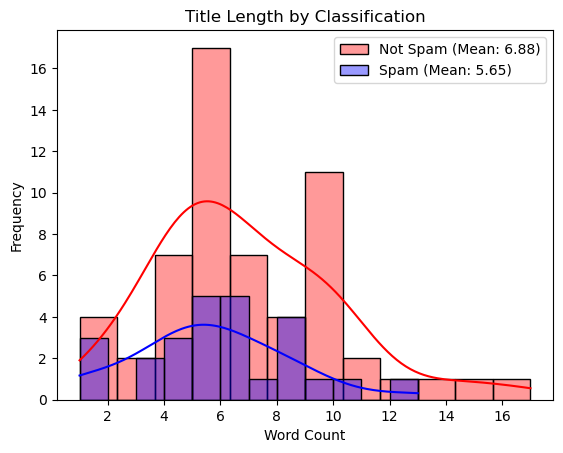

In [138]:
title=data['title']
text=data['text']
type=data['type']

spam_title_words= []
not_spam_title_words= []

for i in range(len(type)):
    if type[i]=='spam':
        list=title[i].split()
        spam_title_words.append(len(list))
    if type[i]=='not spam':
        list=title[i].split()
        not_spam_title_words.append(len(list))


plt.figure()
sns.histplot(not_spam_title_words,color='red',bins=12,alpha=0.4,label=f'Not Spam (Mean: {np.mean(not_spam_title_words):.2f})', kde=True)
sns.histplot(spam_title_words,color='blue',bins=12,alpha=0.4,label=f'Spam (Mean: {np.mean(spam_title_words):.2f})', kde=True)
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Title Length by Classification')

Text(0.5, 1.0, 'Text Length by Classification')

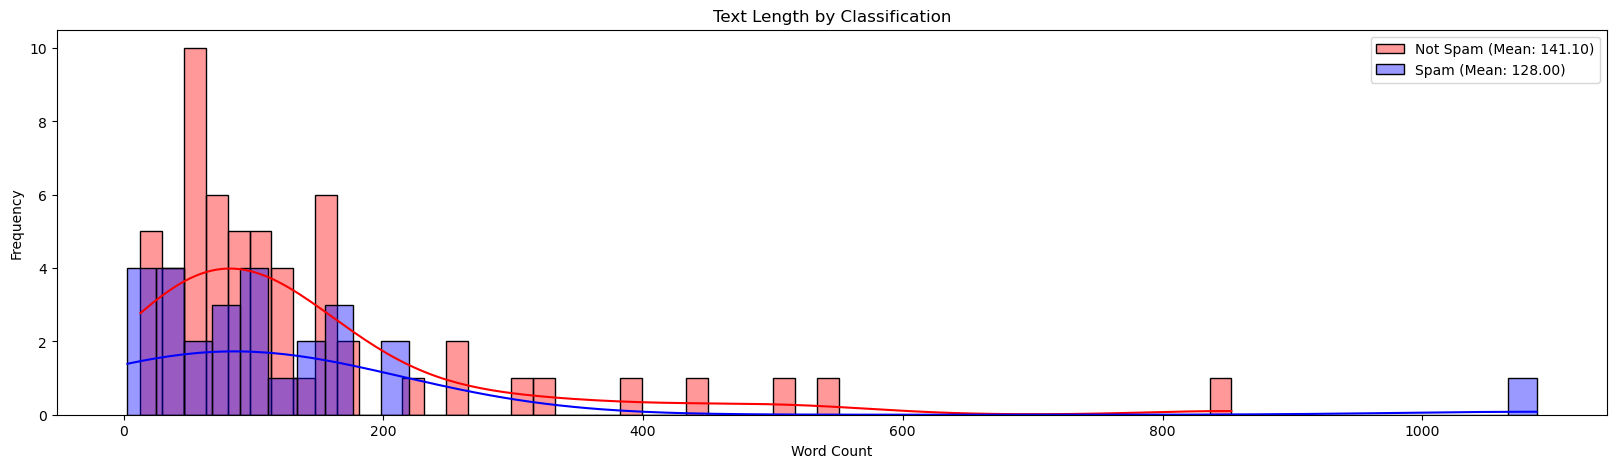

In [140]:
spam_text_words= []
not_spam_text_words= []

for i in range(len(type)):
    if type[i]=='spam':
        list=text[i].split()
        spam_text_words.append(len(list))
    if type[i]=='not spam':
        list=text[i].split()
        not_spam_text_words.append(len(list))


plt.figure(figsize=(20,5))
sns.histplot(not_spam_text_words,color='red',bins=50,alpha=0.4,label=f'Not Spam (Mean: {np.mean(not_spam_text_words):.2f})', kde=True)
sns.histplot(spam_text_words,color='blue',bins=50,alpha=0.4,label=f'Spam (Mean: {np.mean(spam_text_words):.2f})', kde=True)
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Text Length by Classification')

Text(0.5, 1.0, 'Average Title Length by Classification')

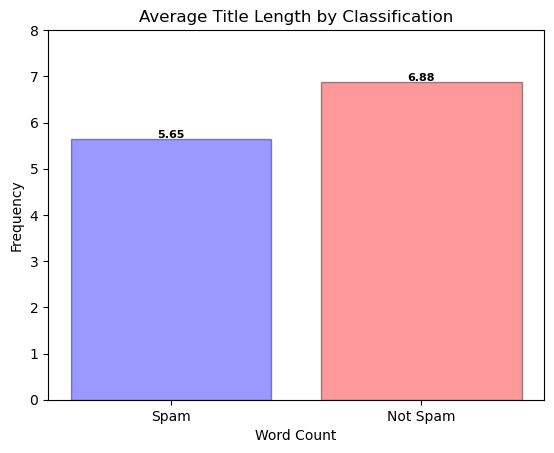

In [186]:
labels=['Spam','Not Spam']
values=[np.mean(spam_title_words),np.mean(not_spam_title_words)]

plt.figure()
bars = plt.bar(labels, values, color=['blue', 'red'], edgecolor='black', alpha=0.4)
for bar in bars:
    height = bar.get_height()  # Get bar height (value)
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02,  # Lower the text
             f"{height:.2f}", ha='center', va='bottom', 
             fontsize=8, fontweight='bold')  # Smaller font size
plt.ylim(0,8)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Average Title Length by Classification')



Text(0.5, 1.0, 'Average Text Length by Classification')

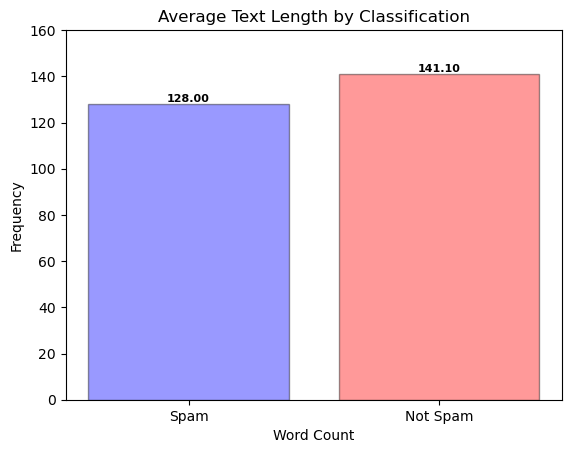

In [198]:
labels2=['Spam','Not Spam']
values2=[np.mean(spam_text_words),np.mean(not_spam_text_words)]

plt.figure()
bars2 = plt.bar(labels2, values2, color=['blue', 'red'], edgecolor='black', alpha=0.4)
for bar in bars2:
    height = bar.get_height()  # Get bar height (value)
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.02,  # Lower the text
             f"{height:.2f}", ha='center', va='bottom', 
             fontsize=8, fontweight='bold')  # Smaller font size
plt.ylim(0,160)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Average Text Length by Classification')



In [222]:
title_length=[]
text_length=[]

for i in title:
    title_length.append(len(i.split()))
for i in text:
    text_length.append(len(i.split()))

In [236]:
le = LabelEncoder()
string_numeric = le.fit_transform(type)

corr_matrix = np.corrcoef(title_length, string_numeric)
corr_coefficient = corr_matrix[0, 1]
print(f"Correlation Coefficient for Title Length vs. Type: {corr_coefficient:.2f}")

corr_matrix2 = np.corrcoef(text_length, string_numeric)
corr_coefficient2 = corr_matrix2[0, 1]
print(f"Correlation Coefficient for Text Length vs. Type: {corr_coefficient2:.2f}")

# It's Giving No Correlation

Correlation Coefficient for Title Length vs. Type: -0.18
Correlation Coefficient for Text Length vs. Type: -0.04
